In [1]:
import ROOT as r

Welcome to JupyROOT 6.12/06


In [2]:
f = r.TFile("./gm2offline_ana_22530535_16119.00442.root")
f.ls()

TFile**		./gm2offline_ana_22530535_16119.00442.root	
 TFile*		./gm2offline_ana_22530535_16119.00442.root	
  KEY: TDirectoryFile	farline;1	farline (CaloFarlineHistograms) folder


In [3]:
f.cd("farline")
f.ls()

TFile**		./gm2offline_ana_22530535_16119.00442.root	
 TFile*		./gm2offline_ana_22530535_16119.00442.root	
  TDirectoryFile*		farline	farline (CaloFarlineHistograms) folder
   KEY: TDirectoryFile	calo1;1	calo1
   KEY: TDirectoryFile	calo2;1	calo2
   KEY: TDirectoryFile	calo3;1	calo3
   KEY: TDirectoryFile	calo4;1	calo4
   KEY: TDirectoryFile	calo5;1	calo5
   KEY: TDirectoryFile	calo6;1	calo6
   KEY: TDirectoryFile	calo7;1	calo7
   KEY: TDirectoryFile	calo8;1	calo8
   KEY: TDirectoryFile	calo9;1	calo9
   KEY: TDirectoryFile	calo10;1	calo10
   KEY: TDirectoryFile	calo11;1	calo11
   KEY: TDirectoryFile	calo12;1	calo12
   KEY: TDirectoryFile	calo13;1	calo13
   KEY: TDirectoryFile	calo14;1	calo14
   KEY: TDirectoryFile	calo15;1	calo15
   KEY: TDirectoryFile	calo16;1	calo16
   KEY: TDirectoryFile	calo17;1	calo17
   KEY: TDirectoryFile	calo18;1	calo18
   KEY: TDirectoryFile	calo19;1	calo19
   KEY: TDirectoryFile	calo20;1	calo20
   KEY: TDirectoryFile	calo21;1	calo21
   KEY: TDirectoryFile	calo

---

* Take the allCaloEnergies histogram and normalize (TH1::Scale) it such that the integral under the curve is 1.
* Make a plot of energy vs. time from the eventTree. It will create a histogram automatically, but try to create your own and then fill it from the tree. Experiment with different bin sizes, what structures in the data appear when you use finer binning?
* Make a plot of x vs. y of positron hits in the calorimeters. Implement an energy cut so that we only see energies above 1 GeV and below 6 GeV.

---

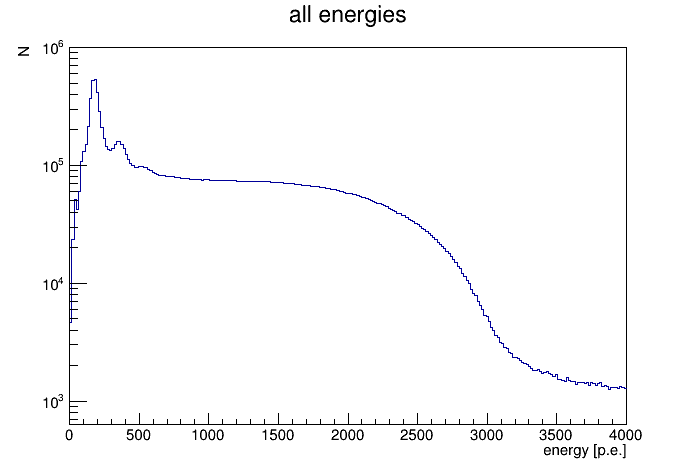

In [48]:
allCaloEnergies = f.Get("farline/allCaloEnergies").Clone("allCaloEnergies") #this creates a copy of the histogram stored in the file
allCaloEnergies.SetDirectory(0) #this tells root to not associate the new histogram with the file, so we can close the file 
                                # and still keep this file around if we want.
c = r.TCanvas() #create a canvas to draw the histogram on
allCaloEnergies.Draw()
c.SetLogy() #set the y axis to a logorithmic scale.
c.Draw()

In [8]:
# now lets normalize the histogram. First get the integral under the curve.
integral = allCaloEnergies.Integral() # by default, integral includes all bins. You can also specify a range of bin numbers.
print("Integral under the curve:", integral)

#now scale the histogram using this value
allCaloEnergies.Scale(1.0/integral)

#and check to make sure it worked
newIntegral = allCaloEnergies.Integral()
print("New integral under the curve:", newIntegral)

Integral under the curve: 14263219.0
New integral under the curve: 0.9999999999999998


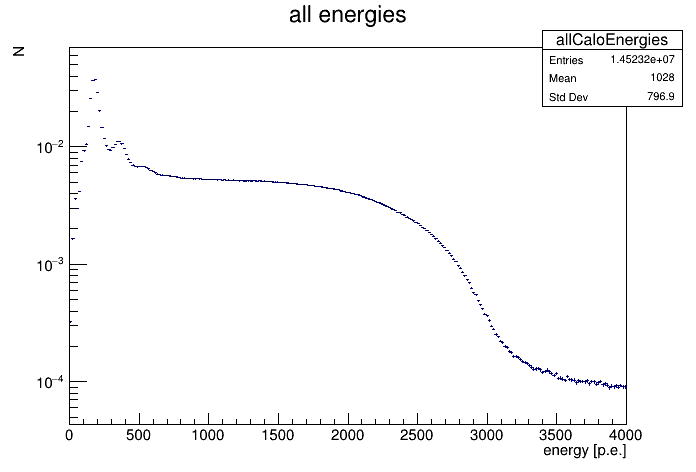

In [9]:
#now lets check out what the histogram looks like
c = r.TCanvas() 
allCaloEnergies.Draw()
c.SetLogy() 
c.Draw()

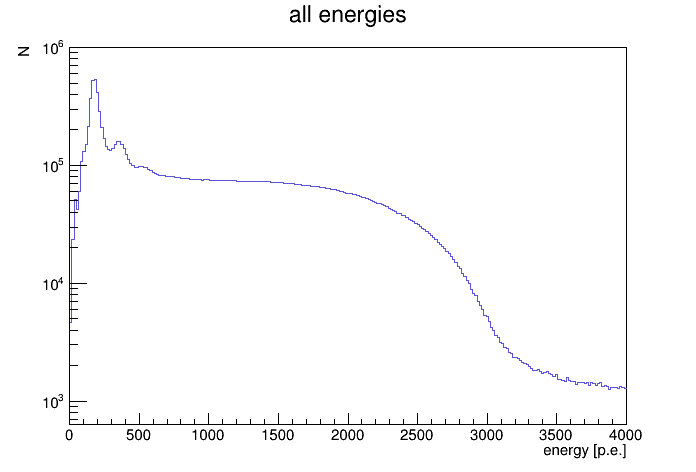

In [56]:
#to make it appear the same as before, we need to specify the drawing options
c = r.TCanvas() 
allCaloEnergies.Draw("hist")
allCaloEnergies.SetLineColor(9)
c.SetLogy() 
c.Draw()

---
Make a plot of energy vs. time from the eventTree. It will create a histogram automatically, but try to create your own and then fill it from the tree. Experiment with different bin sizes, what structures in the data appear when you use finer binning?

In [12]:
#now lets get the tree to start making some plots
t = f.Get("farline/eventTree") #opens the tree from the file. The file must be kept open to continue drawing from the tree.
t.Print() #this displays all the variables stored in the tree.

******************************************************************************
*Tree    :eventTree : eventTree                                              *
*Entries :     2678 : Total =       523269178 bytes  File  Size =  392656273 *
*        :          : Tree compression factor =   1.33                       *
******************************************************************************
*Br    0 :runNum    : runNum/i                                               *
*Entries :     2678 : Total  Size=      12295 bytes  File Size  =       1540 *
*Baskets :       13 : Basket Size=      45334 bytes  Compression=   7.61     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/i                                            *
*Entries :     2678 : Total  Size=      12346 bytes  File Size  =       1634 *
*Baskets :       13 : Basket Size=      45334 bytes  Compression=   7.20     *
*...................................................

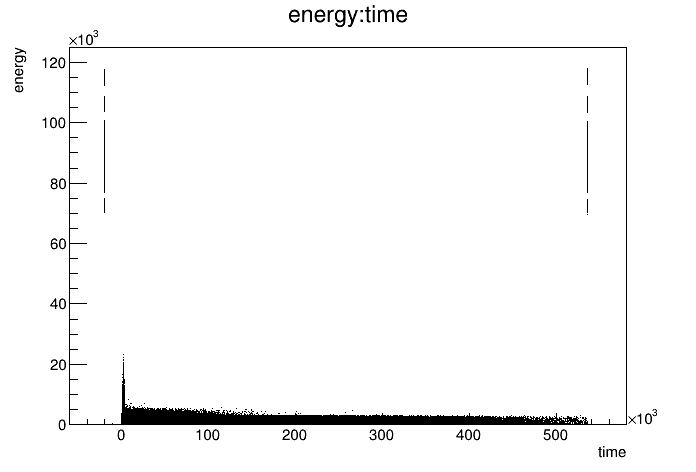

In [24]:
c = r.TCanvas()
t.Draw("energy:time", #the quantities we want to draw, seperated by ':'. The order is y:x. I always forget this. 
       "", #any cuts we want to implement (i.e. energy > 100) would go here
       "" #any draw options will go here
      ) #this will draw what we want, but will just draw points as we haven't selected a draw option
c.Draw()

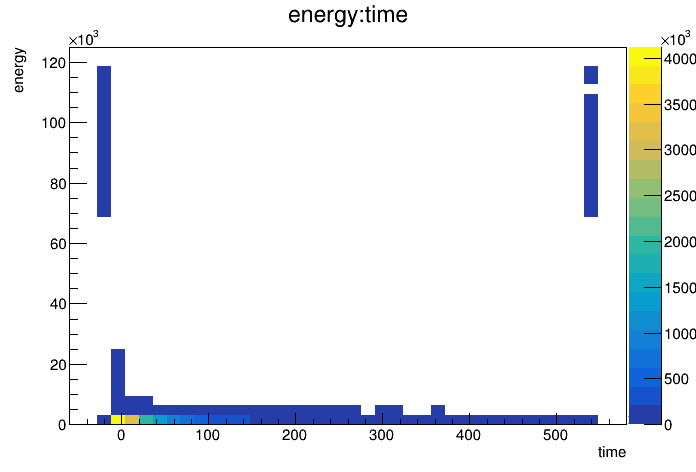

In [14]:
#ok, theres some structure there. How about we get some colors going by drawing it as a histogram
c = r.TCanvas()
t.Draw("energy:time","","colz") #COLZ = colored z axis. Capitalization also doesnt matter here.
c.Draw()

Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).


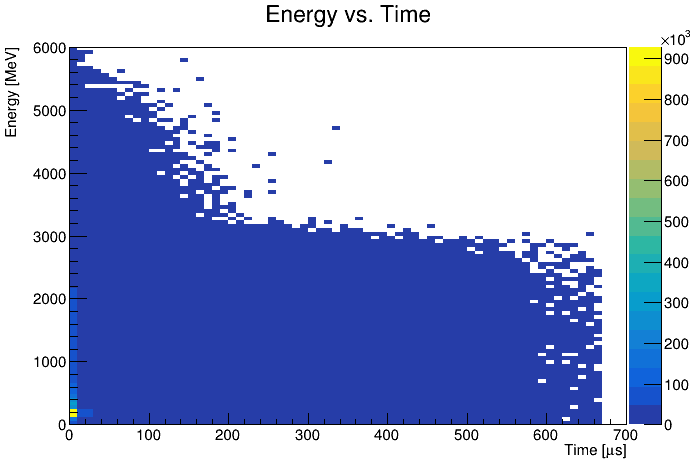

In [57]:
#we need some better bins. For that, we need to fill a histogram of our own choice

h = r.TH2D("h", # name of the histogram in root
          "Energy vs. Time; Time [#mus]; Energy [MeV]", #histogram main title and axes titles, seperated by ; 
           70,0,700, # x-axis: number of bins, lower bound, upper bound
           100,0,6000 ) #same, but for y-axis

c = r.TCanvas()
t.Draw("energy:time*1.25/1000.>>h","","goff") # >>h fills the histogram from the tree. goff = no graphics.
h.Draw("colz") #now we can draw the histogram we just filled
c.Draw()

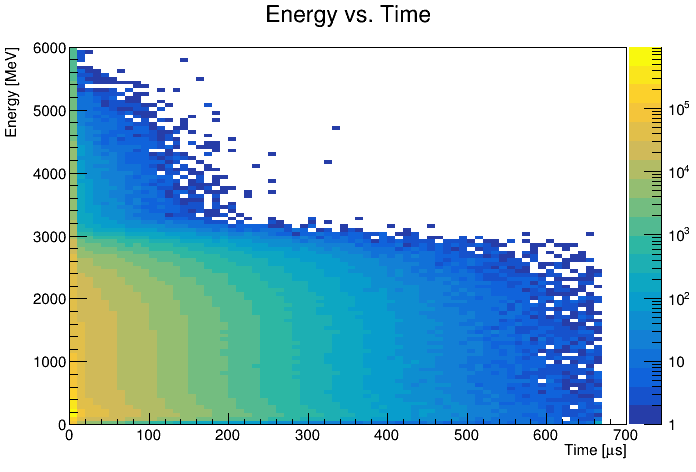

In [58]:
#still hard to see something on a linear scale. How about log?
c2 = r.TCanvas()
h.Draw("colz") #now we can draw the histogram we just filled
c2.SetLogz()
c2.Draw()

In [19]:
#Lets see how different binning affects this
xbins = [70, 400, 700, 4700, 10000, 47000]
hists = [] #empty array to store histogram in
for xbin in xbins:
    h = r.TH2D("h_"+str(xbin), # name of the histogram in root
          "Energy vs. Time for "+str(xbin)+" time bins; Time [#mus]; Energy [MeV]", #histogram main title and axes titles, seperated by ; 
           xbin,0,700, # x-axis: number of bins, lower bound, upper bound
           100,0,6000 ) #same, but for y-axis

    t.Draw("energy:time*1.25/1000.>>h_"+str(xbin),"","goff") 
    hists.append(h.Clone("h_"+str(xbin))) #append this histogram to the array

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


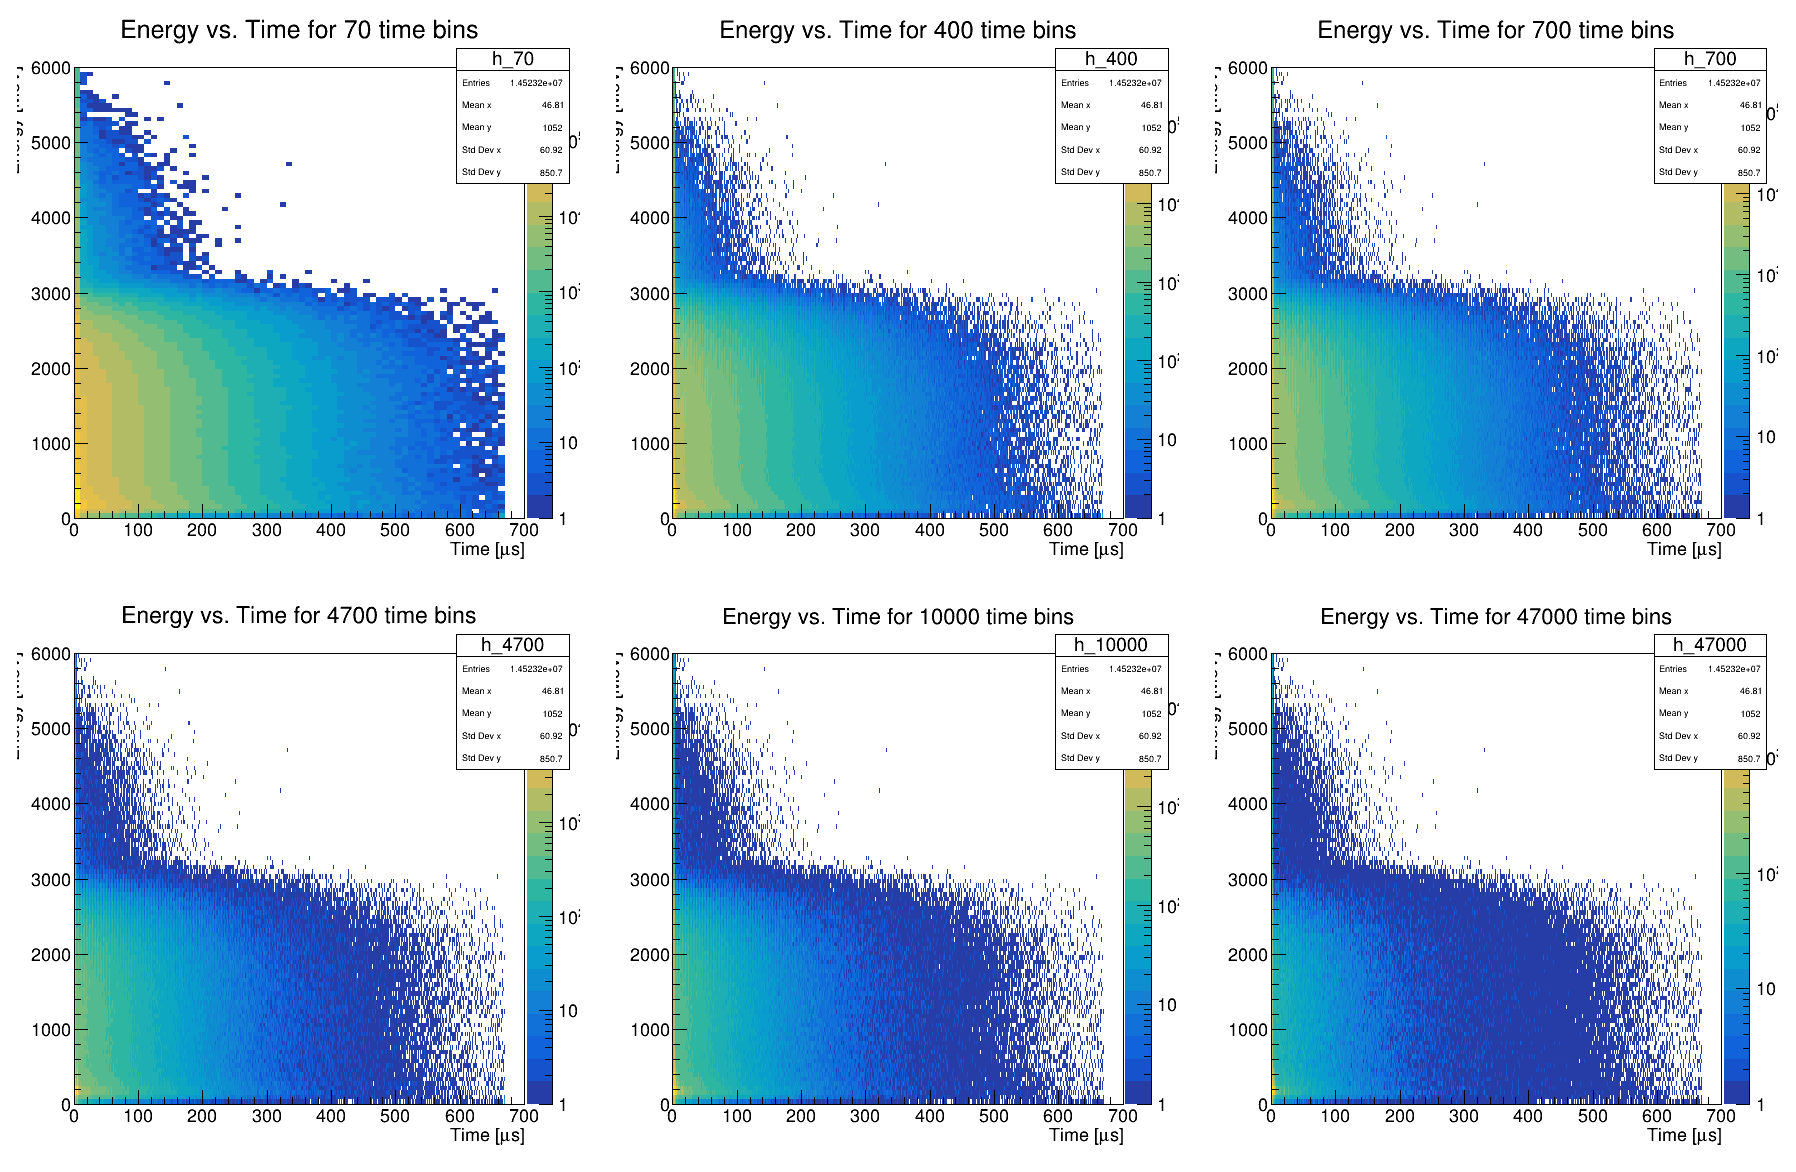

In [20]:
c = r.TCanvas("c","c", 1800, 1200) #we can also specify the height and width of the canvas
c.Divide(3,2) #this divides the canvas into sub-pads, which can each be drawn into like a seperate canvas
for i, h in enumerate(hists):
    c.cd(i+1) #this is indexed starting at 1. c.cd(0) is the main pad which contains all the subpads
    h.Draw("colz")
    r.gPad.SetLogz() # r.gPad allows you to control just the settings for this pad.
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


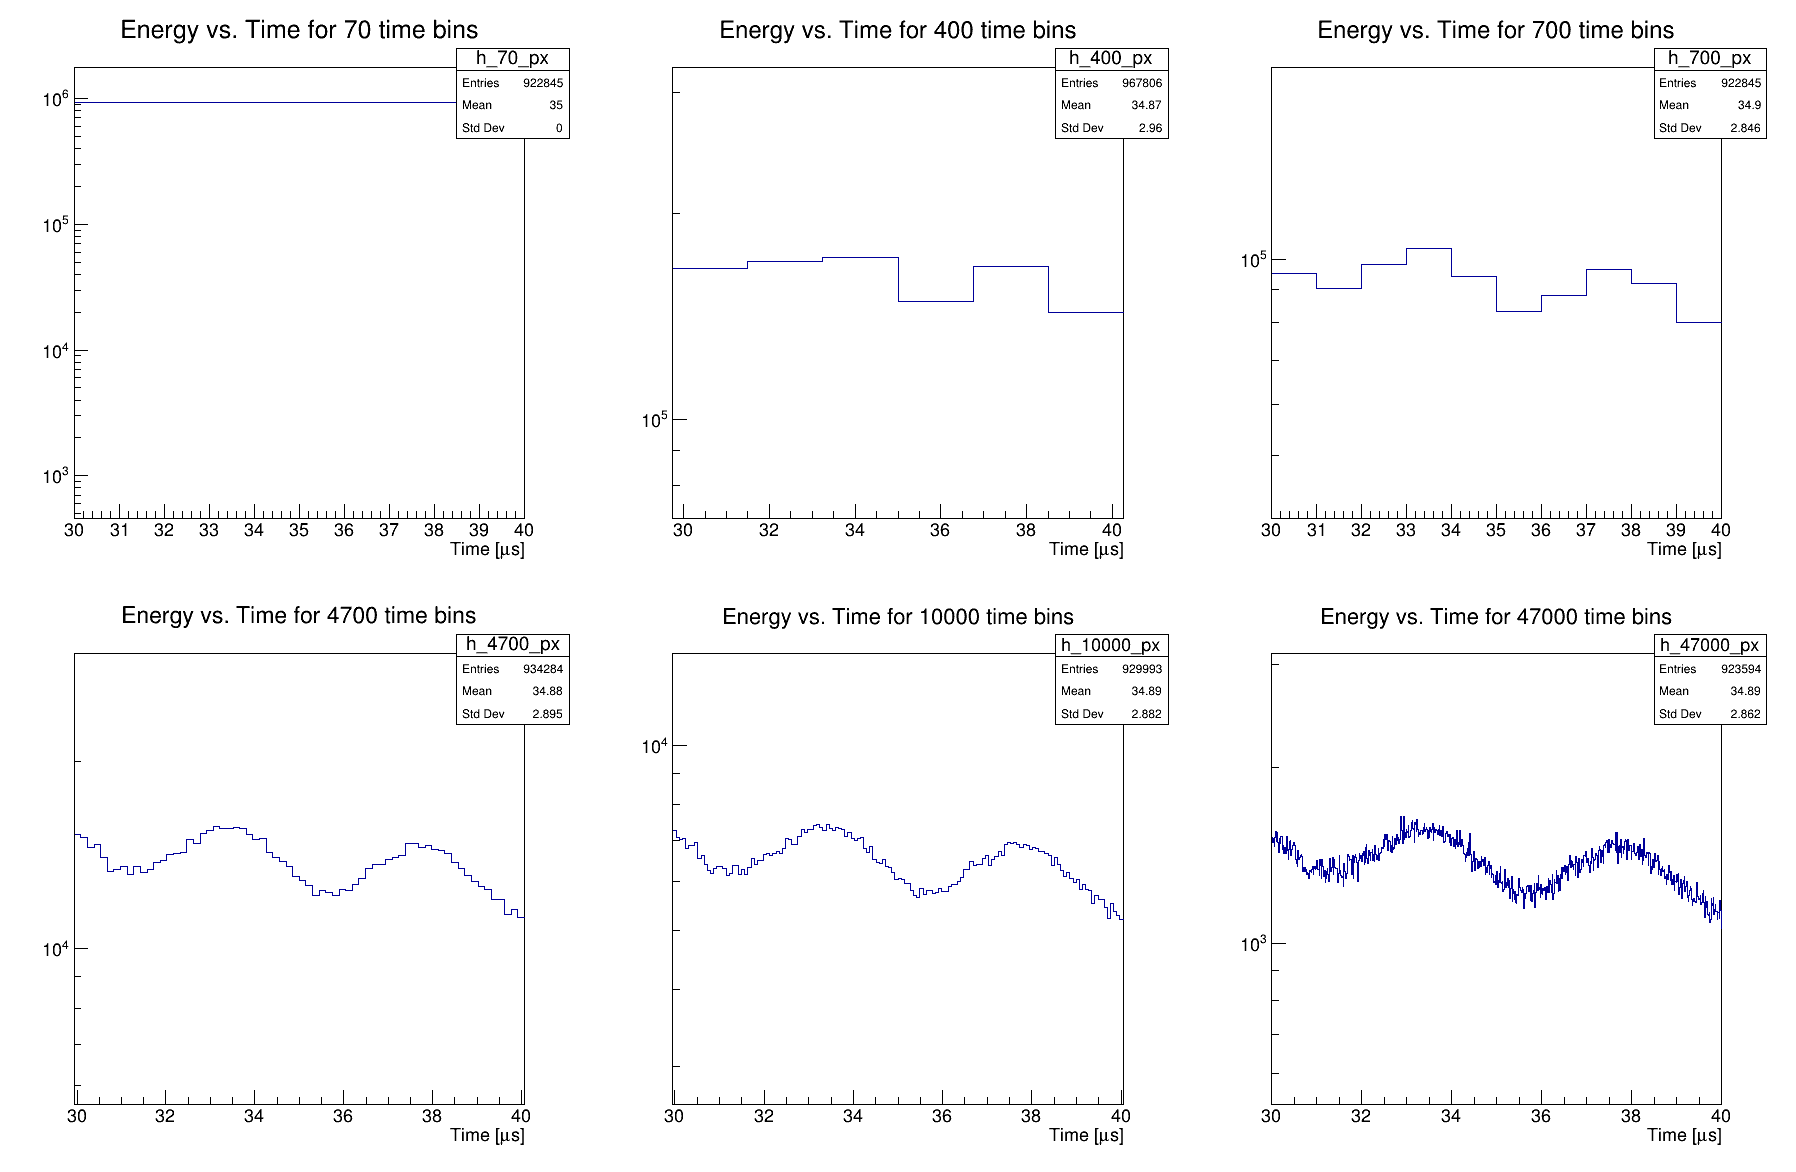

In [23]:
# what about if we look at the x projections? Do we see different structures there?
c = r.TCanvas("c","c", 1800, 1200) 
c.Divide(3,2) 
for i, h in enumerate(hists):
    c.cd(i+1) 
    h.GetXaxis().SetRangeUser(30,40)
    h.ProjectionX().Draw("hist") #projects this onto the x-axis
    r.gPad.SetLogy() 
c.Draw()

---
Make a plot of x vs. y of positron hits in the calorimeters. Implement an energy cut so that we only see energies above 1 GeV and below 6 GeV.

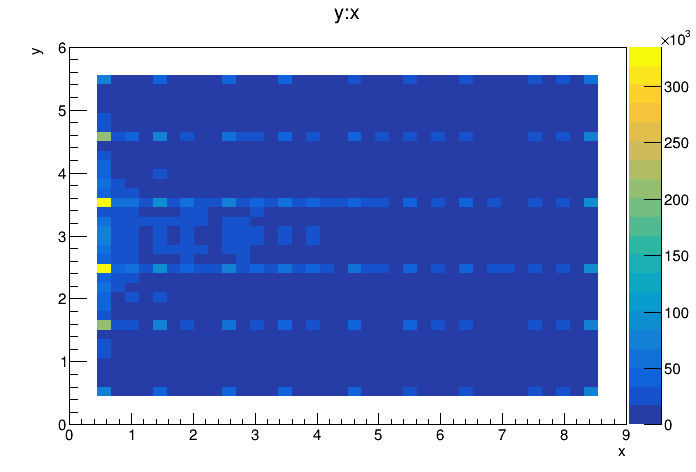

In [25]:
#lets first draw without creating a histogram of our own, just to see what we're dealing with here
c = r.TCanvas()
t.Draw("y:x","","colz")
c.Draw()

In [30]:
#ok, so it looks like we go from 0-9 and 0-6. Now we can create a histogram to fill.
h = r.TH2D("h","Reconstructed Positions of Hits in the Calorimeters; x [xtals]; y [xtals]",
          90,0,9,
          60,0,6)
t.Draw("y:x>>h","","goff")

14523195

Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).


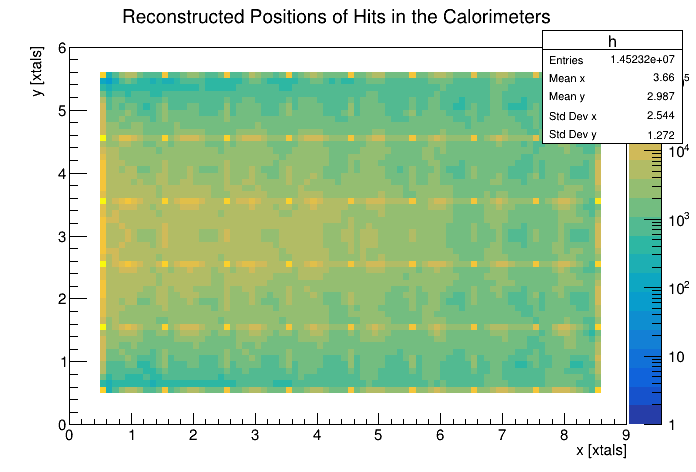

In [31]:
c = r.TCanvas()
h.Draw("colz")
c.SetLogz()
c.Draw()

In [34]:
# now lets add in the energy cut.
h2 = h.Clone("h2") #create a copy of h
h2.Reset() #and wipe it clean
h2.SetTitle("Reconstructed Positions of Hits in the Calorimeters [1. < E (GeV) < 6.]") #change the title to indicate the energy cut
t.Draw("y:x>>h2","energy > 1000 && energy < 6000","goff")

6540026

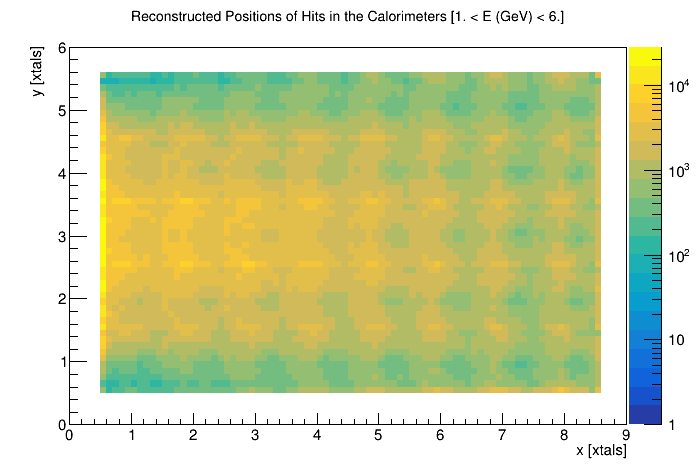

In [39]:
c = r.TCanvas()
h2.Draw("colz")
r.gStyle.SetOptStat(0) #lets get rid of the stats box for the minute
c.SetLogz()
c.Draw()

In [43]:
#lets look at more energy cuts. Does the energy of the particle effect where it hits?
energies = [0,1000,2000,3500,6000,100000000000]
hists = []
for i in range(len(energies) - 1):
    e1 = energies[i]
    e2 = energies[i+1]
    cutString = "energy > "+str(e1)+" && energy < "+str(e2)
    hi = r.TH2D("h_"+str(e1),"Calorimeter Hits: "+cutString+"; x [xtals]; y [xtals]",
              90,0,9,
              60,0,6)
    t.Draw("y:x>>h_"+str(e1), cutString, "goff")
    hists.append(hi.Clone("h_"+str(e1)))
print(hists)

[<ROOT.TH2D object ("h_0") at 0x7f1e7fbfe2a0>, <ROOT.TH2D object ("h_1000") at 0x7f1e7fc821d0>, <ROOT.TH2D object ("h_2000") at 0x7f1e7fc33e90>, <ROOT.TH2D object ("h_3500") at 0x7f1e7fbfb4e0>, <ROOT.TH2D object ("h_6000") at 0x7f1e7fc2f090>]


Warning in <TDirectoryFile::Append>: Replacing existing TH1: h_6000 (Potential memory leak).


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


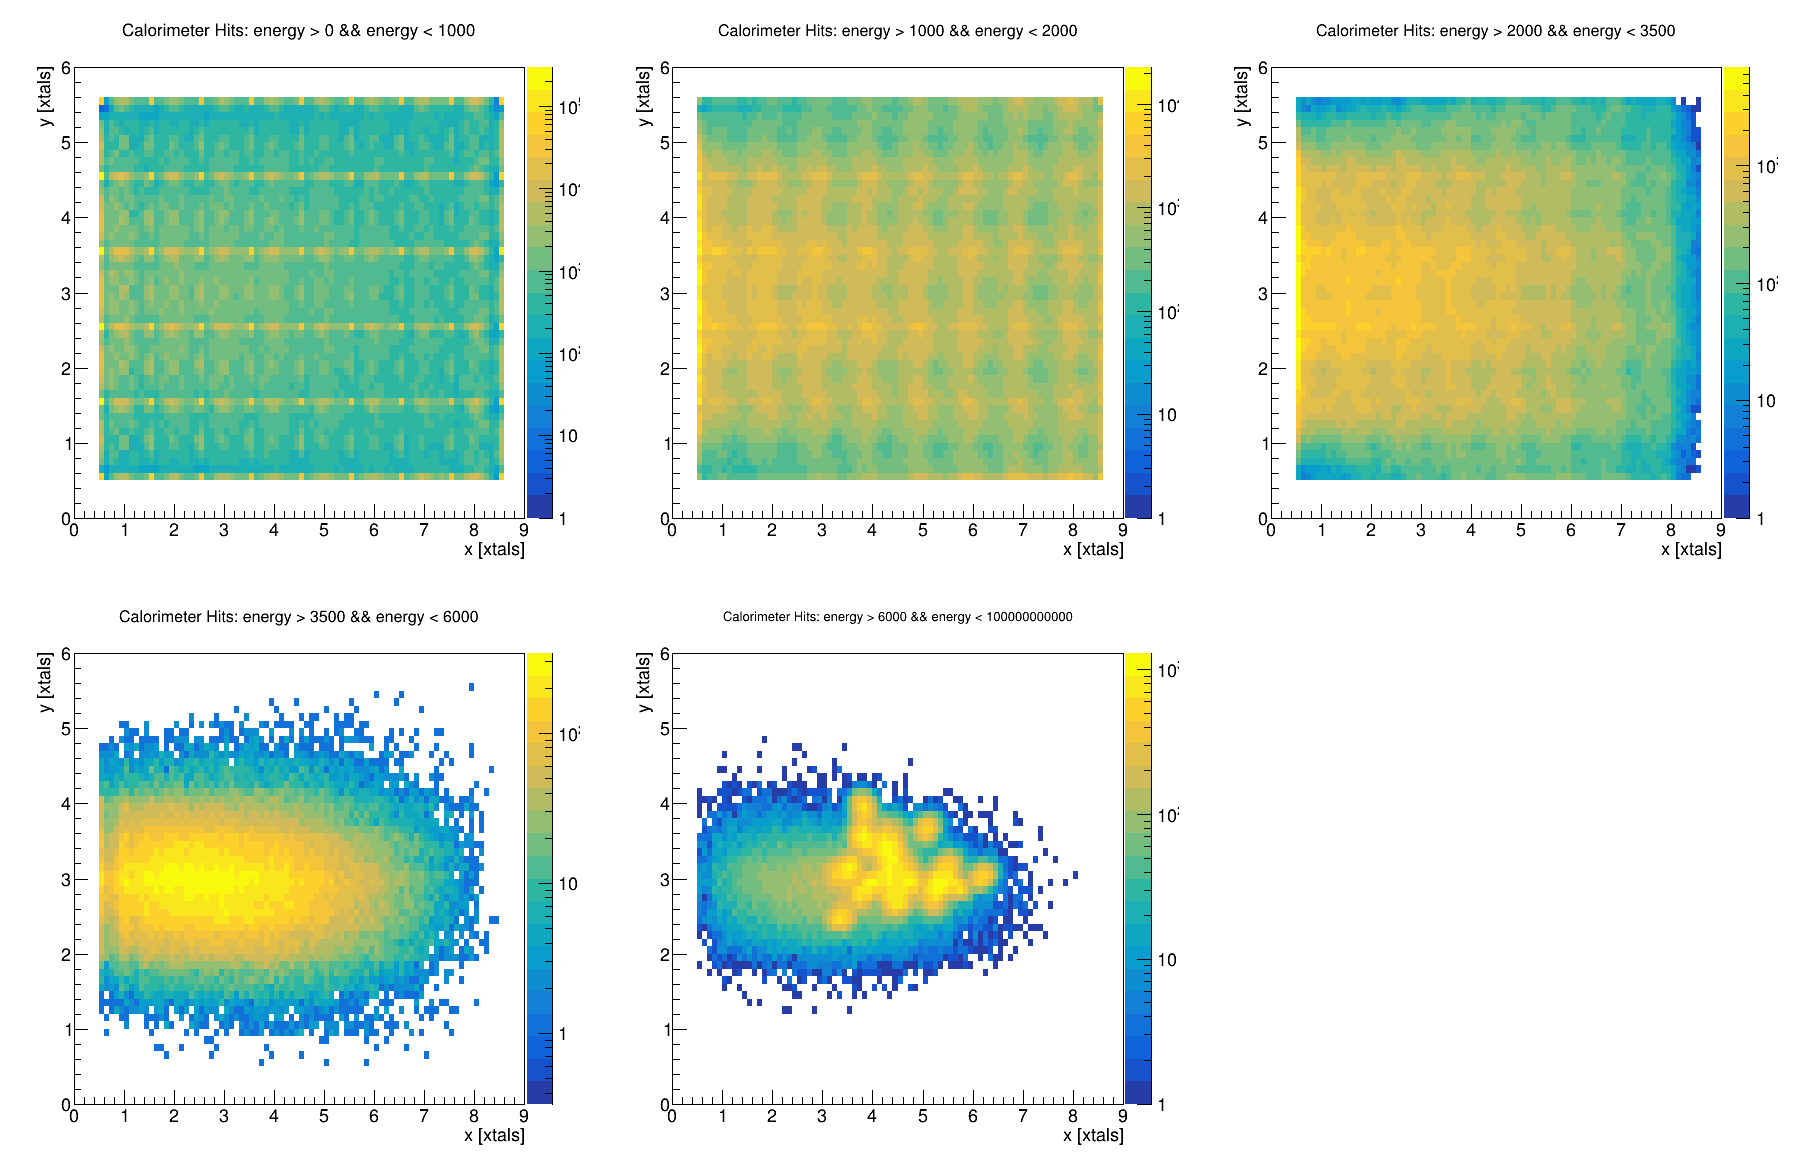

In [44]:
c = r.TCanvas("c","c", 1800, 1200) #we can also specify the height and width of the canvas
c.Divide(3,2) #this divides the canvas into sub-pads, which can each be drawn into like a seperate canvas
for i, h in enumerate(hists):
    c.cd(i+1) #this is indexed starting at 1. c.cd(0) is the main pad which contains all the subpads
    h.Draw("colz")
    r.gPad.SetLogz() # r.gPad allows you to control just the settings for this pad.
c.Draw()

In [45]:
#what about for a single calorimeter?
energies = [0,1000,2000,3500,6000,100000000000]
hists_singleCalo = []
for i in range(len(energies) - 1):
    e1 = energies[i]
    e2 = energies[i+1]
    cutString = "energy > "+str(e1)+" && energy < "+str(e2)+" && caloNum == 4" #pick a calorimeter at random.
    hi = r.TH2D("h_"+str(e1),"Calorimeter Hits: "+cutString+"; x [xtals]; y [xtals]",
              90,0,9,
              60,0,6)
    t.Draw("y:x>>h_"+str(e1), cutString, "goff")
    hists_singleCalo.append(hi.Clone("h_"+str(e1)))

Warning in <TDirectoryFile::Append>: Replacing existing TH1: h_0 (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h_1000 (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h_2000 (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h_3500 (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h_6000 (Potential memory leak).


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


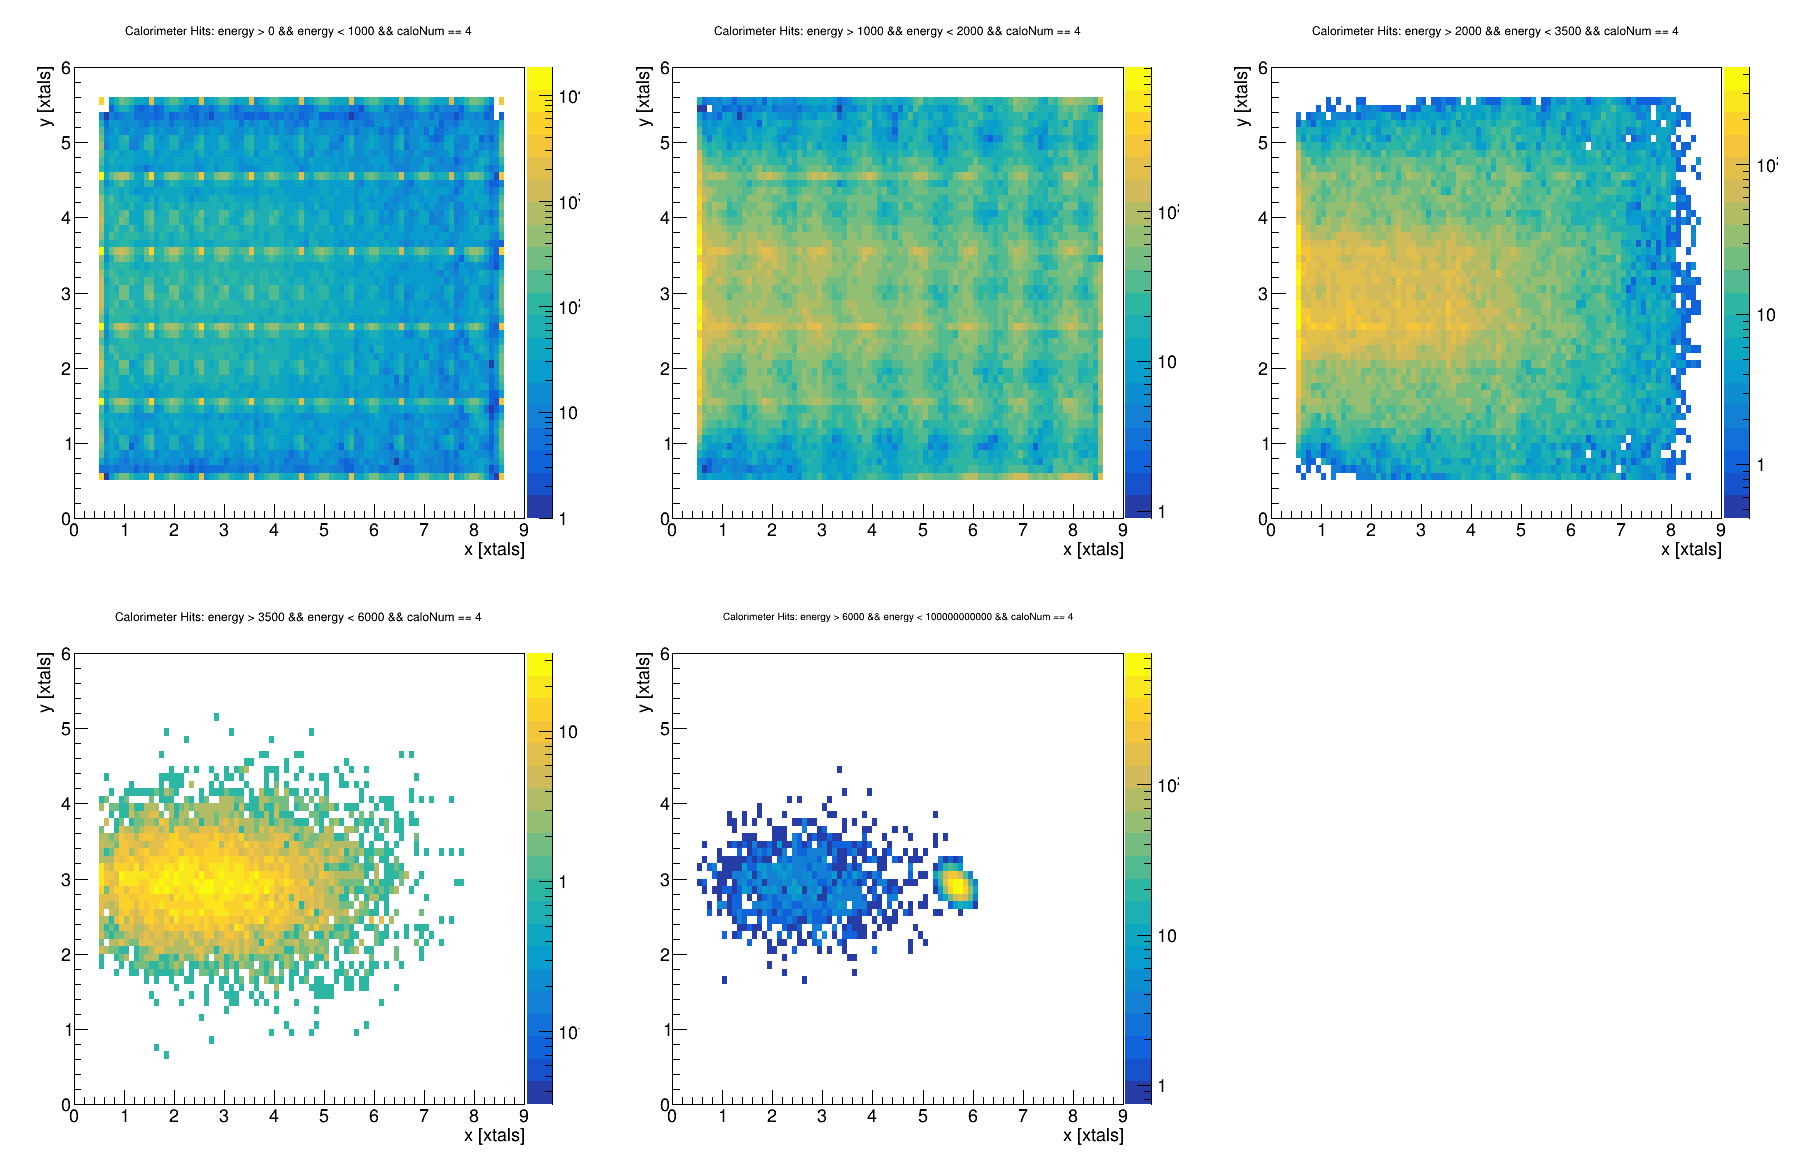

In [46]:
c = r.TCanvas("c","c", 1800, 1200) #we can also specify the height and width of the canvas
c.Divide(3,2) #this divides the canvas into sub-pads, which can each be drawn into like a seperate canvas
for i, h in enumerate(hists_singleCalo):
    c.cd(i+1) #this is indexed starting at 1. c.cd(0) is the main pad which contains all the subpads
    h.Draw("colz")
    r.gPad.SetLogz() # r.gPad allows you to control just the settings for this pad.
c.Draw()